In [8]:
%run Load_Data.ipynb import *
import neurokit2 as nk
import numpy as np
from lib.biosignals import *
from lib.acquisition import *
from lib.sensors import *

Using matplotlib backend: Qt5Agg


In [2]:
resp = np.array(CH3)
resp = resp.astype(float)
time=np.array(bsnb.generate_time(resp,fs))

In [3]:
len(CH3)

2254624

In [4]:
signals,info = nk.rsp_process(resp,fs)
signals["RSP_Clean"] = nk.rsp_clean(signals["RSP_Raw"],fs,method="biosppy")
info,peaks = nk.rsp_peaks(signals["RSP_Clean"],fs)
signals["RSP_Peaks"] = info["RSP_Peaks"]
signals["RSP_Troughs"] = info["RSP_Troughs"]

In [5]:
signals

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs
0,1.38016,-0.017925,0.343052,14.028625,NaN,0.0,0,0
1,1.37828,-0.017814,0.343052,14.028625,NaN,0.0,0,0
2,1.37851,-0.017703,0.343052,14.028625,NaN,0.0,0,0
3,1.37805,-0.017592,0.343052,14.028625,NaN,0.0,0,0
4,1.37851,-0.017481,0.343052,14.028625,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...
2254619,1.63312,-0.000032,0.164432,14.616322,NaN,0.0,0,0
2254620,1.62872,-0.000032,0.164432,14.616322,NaN,0.0,0,0
2254621,1.63010,-0.000032,0.164432,14.616322,NaN,0.0,0,0
2254622,1.63115,-0.000032,0.164432,14.616322,NaN,0.0,0,0


In [9]:
np.mean(signals["RSP_Rate"])

14.124397892954294

In [6]:
info,peak_signals = nk.rsp_peaks(signals["RSP_Clean"])
nk.rsp_rrv(signals["RSP_Rate"],peaks=peak_signals["RSP_Troughs"])

,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,818.277696,4359.678988,918.437501,819.076403,0.210666,0.187692,4120.0,769.4694,0.186764,NaN,...,30.324148,NaN,NaN,579.174479,1162.588409,2.00732,1.256375,1.299978,1.091963,0.568986


Using matplotlib backend: Qt5Agg


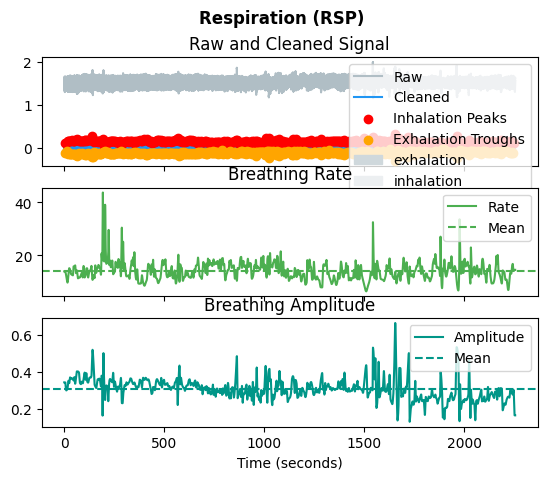

In [10]:
%matplotlib
nk.rsp_plot(signals,fs)